In [45]:
import os
os.chdir('/content/drive/MyDrive/Maciej_Zielonka_Senior_Project/Maciej_Zielonka_CPSC_490/src')

# Model Evaluation

Here we will run some evaluation techniques to see which model is best to use for the sake of this project, and which features contribute most to the classification

In [46]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import numpy as np

In [47]:
# # Load the Data
import pandas as pd

features_df = pd.read_csv("features_df_2.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features.values
y = labels.values

In [48]:
def clf_accuracy(clf, clf_name, x_test, y_test):
  y_pred = clf.predict(x_test)
  disp = metrics.plot_confusion_matrix(clf, x_test, y_test,
                                  display_labels=[0,1],
                                  cmap=plt.cm.Blues)

  print(disp.confusion_matrix)
  print("Accuracy of", clf_name, ":", metrics.accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[39  8]
 [15 39]]
Accuracy of Logistic Regression : 0.7722772277227723
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77        47
         1.0       0.83      0.72      0.77        54

    accuracy                           0.77       101
   macro avg       0.78      0.78      0.77       101
weighted avg       0.78      0.77      0.77       101



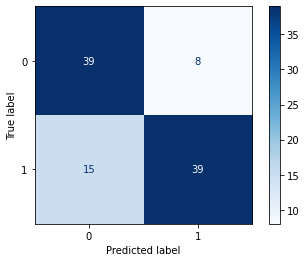

In [49]:
def run_logistic_regression(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Logistic Regression", x_test, y_test)  
  return clf
lr_clf = run_logistic_regression(X, y)

### Random Forest

[[38  9]
 [ 8 46]]
Accuracy of Random Forest : 0.8316831683168316
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        47
         1.0       0.84      0.85      0.84        54

    accuracy                           0.83       101
   macro avg       0.83      0.83      0.83       101
weighted avg       0.83      0.83      0.83       101



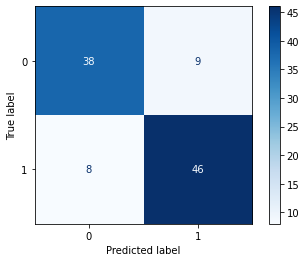

In [65]:
def run_random_forest(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = RandomForestClassifier()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Random Forest", x_test, y_test)
  return clf
tree_clf = run_random_forest(X, y)

### SVM

[[33 14]
 [18 36]]
Accuracy of SVM : 0.6831683168316832
              precision    recall  f1-score   support

         0.0       0.65      0.70      0.67        47
         1.0       0.72      0.67      0.69        54

    accuracy                           0.68       101
   macro avg       0.68      0.68      0.68       101
weighted avg       0.69      0.68      0.68       101



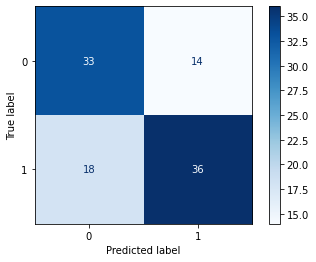

In [67]:
def run_svm(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = svm.SVC(kernel='linear')
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "SVM", x_test, y_test)
  return clf
svm_clf = run_svm(X, y)

### Decision Tree

[[36 11]
 [12 42]]
Accuracy of Decision Tree : 0.7722772277227723
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76        47
         1.0       0.79      0.78      0.79        54

    accuracy                           0.77       101
   macro avg       0.77      0.77      0.77       101
weighted avg       0.77      0.77      0.77       101



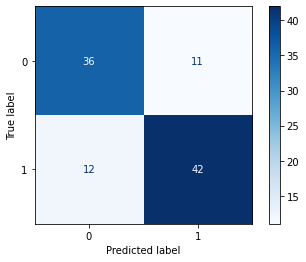

In [68]:
def run_decision_tree(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = tree.DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Decision Tree", x_test, y_test)
  return clf
decision_tree_clf = run_decision_tree(X, y)

### Linear Discriminant Analysis

[[26 21]
 [14 40]]
Accuracy of LDA : 0.6534653465346535
              precision    recall  f1-score   support

         0.0       0.65      0.55      0.60        47
         1.0       0.66      0.74      0.70        54

    accuracy                           0.65       101
   macro avg       0.65      0.65      0.65       101
weighted avg       0.65      0.65      0.65       101



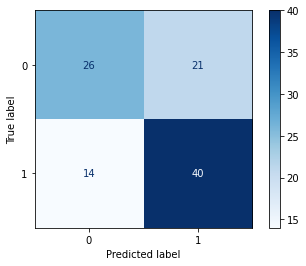

In [69]:
def run_lda(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = LinearDiscriminantAnalysis()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "LDA", x_test, y_test)
  return clf
lda_clf = run_lda(X, y)

### Naive Bayes

[[34 13]
 [11 43]]
Accuracy of Naive Bayes : 0.7623762376237624
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        47
         1.0       0.77      0.80      0.78        54

    accuracy                           0.76       101
   macro avg       0.76      0.76      0.76       101
weighted avg       0.76      0.76      0.76       101



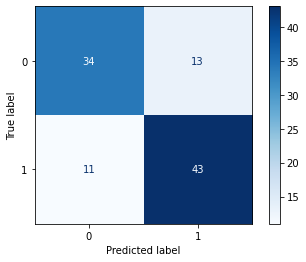

In [70]:
def run_nb(features_array, labels_array):
  x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, stratify=labels_array)
  clf = GaussianNB()
  clf.fit(x_train, y_train)
  clf_accuracy(clf, "Naive Bayes", x_test, y_test)
  return clf
lda_clf = run_nb(X, y)

## Feature Engineering

## Dimensionality Reduction: PCA

In [74]:
pca = PCA(n_components=2, svd_solver='full')
features_pca = pca.fit_transform(X)

[[26 21]
 [20 34]]
Accuracy of Random Forest : 0.594059405940594
              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56        47
         1.0       0.62      0.63      0.62        54

    accuracy                           0.59       101
   macro avg       0.59      0.59      0.59       101
weighted avg       0.59      0.59      0.59       101

[[ 0 47]
 [ 1 53]]
Accuracy of SVM : 0.5247524752475248
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.53      0.98      0.69        54

    accuracy                           0.52       101
   macro avg       0.27      0.49      0.34       101
weighted avg       0.28      0.52      0.37       101

[[27 20]
 [13 41]]
Accuracy of Decision Tree : 0.6732673267326733
              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62        47
         1.0       0.67      0.76      0.71       

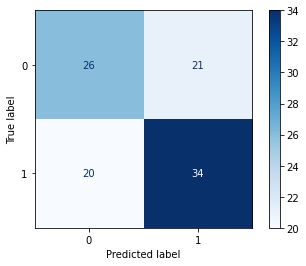

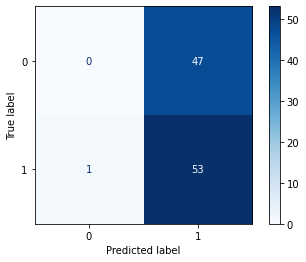

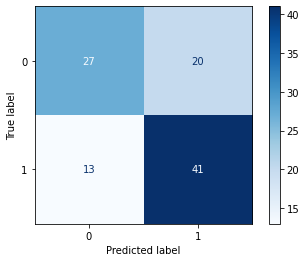

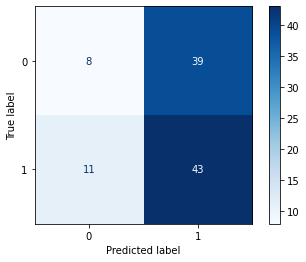

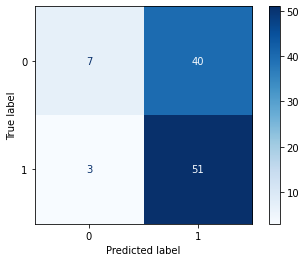

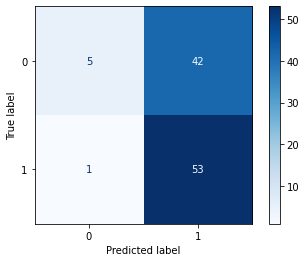

In [75]:
pca_rf_clf = run_random_forest(features_pca, labels)
pca_svm_clf = run_svm(features_pca, labels)
pca_dt_clf = run_decision_tree(features_pca, labels)
pca_nb_clf = run_nb(features_pca, labels)
pca_lda_clf = run_lda(features_pca, labels)
pca_lr_clf = run_logistic_regression(features_pca, labels)

Running the classifier on PCA-reduced features doesn't work as well

# Feature Selection

Here we run a few feature selection techniques to see which features contribute most

In [81]:
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df_2.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# apply SelectKBest class to extract top 10 best features
chi_selector = SelectKBest(score_func=chi2, k=10)

X_norm = MinMaxScaler().fit_transform(X)
fit_norm = chi_selector.fit(X_norm,y)
dfcolumns = pd.DataFrame(X.columns)
dfscores_norm = pd.DataFrame(fit_norm.scores_)
chi_support = chi_selector.get_support()

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores_norm],axis=1)
featureScores.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Normalized Score'))  # print 10 best features'''

             Features  Normalized Score
27           rms mean         11.451928
28            rms std         11.010083
43            mel std         10.668672
42           mel mean         10.042008
17       mfccs 8 mean          5.710040
80  chroma_stft 5mean          5.557500
1        mfccs 0 mean          5.499366
19       mfccs 9 mean          5.338274
81   chroma_stft 5std          5.086040
16        mfccs 7 std          4.978362


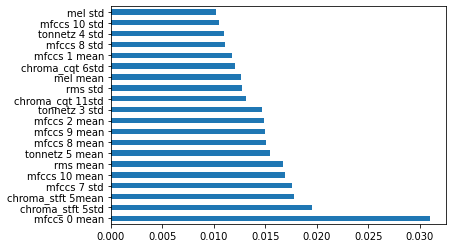

In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, y)

# plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

featureScores = pd.DataFrame({'feature': rfe_feature, 'score': rfe_selector.estimator_.coef_[0]})
print(featureScores)

Fitting estimator with 133 features.
Fitting estimator with 123 features.
Fitting estimator with 113 features.
Fitting estimator with 103 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 93 features.
Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.
Fitting estimator with 13 features.
         feature     score
0    mfccs 1 std  0.015315
1   mfccs 3 mean  0.056937
2    mfccs 5 std -0.080711
3    mfccs 7 std  0.053578
4   mfccs 9 mean  0.099824
5  mfccs 10 mean  0.059644
6  mfccs 12 mean  0.136135
7       rms skew -0.487787
8      flat skew  0.028044
9       mel skew  0.112125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr_selector = SelectFromModel(estimator=LogisticRegression(penalty='l2', solver='newton-cg'), max_features=10)
lr_selector.fit(X, y)
lr_support = lr_selector.get_support()
lr_feature = X.loc[:,lr_support].columns.tolist()

allFeatureScores = pd.DataFrame({'feature': X.columns, 'score': lr_selector.estimator_.coef_[0]})
featureScores = allFeatureScores.loc[allFeatureScores.feature.isin(lr_feature)]

print(featureScores)

                feature     score
29             rms skew -0.482645
55    chroma_cens 1 std -0.380488
59      chroma_cqt 1std  0.406552
72   chroma_cens 4 mean  0.411899
74    chroma_stft 4mean -0.563825
75     chroma_stft 4std -0.730023
83      chroma_cqt 5std  0.396672
89      chroma_cqt 6std  0.429349
103   chroma_cens 9 std -0.524206
107     chroma_cqt 9std  0.535741


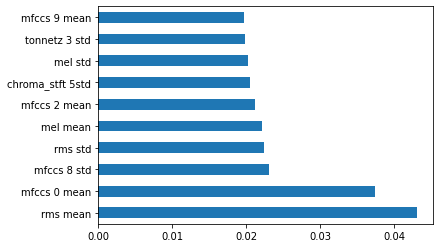

In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
rf_selector.fit(X, y)
rf_support = rf_selector.get_support()
rf_feature = X.loc[:,rf_support].columns.tolist()
#print(rf_feature)

model = RandomForestClassifier()
model.fit(X, y)
#print(model.feature_importances_)

# plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()

In [87]:
num_feats = 10 # number of features to select
pearson_corrs = []
feature_names = X.columns.tolist()

# calculate the correlation of each feature with target
for f in feature_names:
    pearson_corr = np.corrcoef(X[f], y)[0, 1]
    pearson_corrs.append(pearson_corr)

# replace NaN with 0
pearson_corrs = [0 if np.isnan(i) else i for i in pearson_corrs]

# feature name
selected_features = X.iloc[:,np.argsort(np.abs(pearson_corrs))[-num_feats:]].columns.tolist()

# feature support
cor_support = [True if i in selected_features else False for i in feature_names]

# feature selection
allFeatureScores = pd.DataFrame({'feature': X.columns, 'score': pearson_corrs})
featureScores = allFeatureScores.loc[allFeatureScores.feature.isin(selected_features)]

print(featureScores)

               feature     score
1         mfccs 0 mean  0.473975
16         mfccs 7 std  0.432659
17        mfccs 8 mean  0.431784
18         mfccs 8 std  0.390166
19        mfccs 9 mean  0.452227
22        mfccs 10 std  0.392647
27            rms mean  0.439127
80   chroma_stft 5mean -0.422291
81    chroma_stft 5std -0.439334
128      tonnetz 3 std  0.399863


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


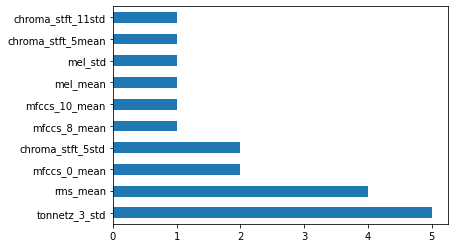

In [88]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

# hm... why is everything 0?
X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]
lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
lgbc.fit(X, y)

lgb_selector = SelectFromModel(lgbc, max_features=10)
lgb_selector.fit(X, y)
lgb_support = lgb_selector.get_support()
lgb_feature = X.loc[:,lgb_support].columns.tolist()

importances = pd.Series(lgbc.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


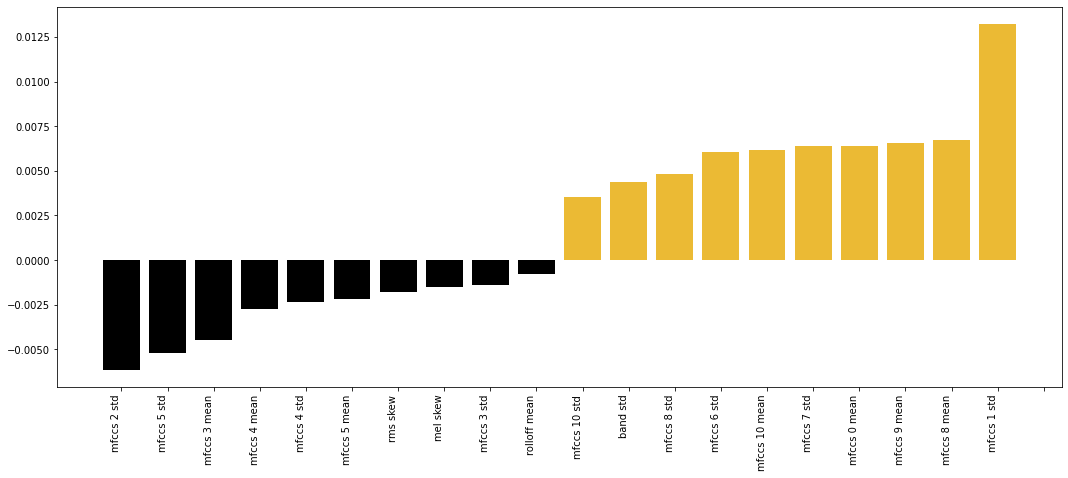

In [89]:
from sklearn import svm
import matplotlib.pyplot as plt

def feature_plot(classifier, feature_names, top_features=4):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['#000000' if c < 0 else '#ebba34' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.show()

trainedsvm = svm.LinearSVC().fit(X, y)
feature_plot(
    trainedsvm,
    features_df.drop(['Unnamed: 0', 'Engaged'], axis = 1).columns.values, 
    10
)

In [90]:
num_feats = 10
# put all selection together
feature_selection_df = pd.DataFrame(
    {'Feature': X.columns, 
     'Pearson': cor_support, 
     'Chi-2': chi_support, 
     'RFE': rfe_support, 
     'Logistics': lr_support,
     'Random Forest': rf_support, 
     'LightGBM': lgb_support
    })

# count the selected times for each feature
feature_selection_df['Count'] = np.sum(feature_selection_df, axis=1)

# display
feature_selection_df = feature_selection_df.sort_values(['Count', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df.head(20)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Count
1,rms_mean,True,True,False,False,True,True,4
2,mfccs_8_mean,True,True,False,False,True,True,4
3,mfccs_7_std,True,True,True,False,True,False,4
4,mfccs_0_mean,True,True,False,False,True,True,4
5,chroma_stft_5std,True,True,False,False,True,True,4
6,chroma_stft_5mean,True,True,False,False,True,True,4
7,mfccs_9_mean,True,True,True,False,False,False,3
8,mfccs_10_mean,False,False,True,False,True,True,3
9,mel_mean,False,True,False,False,True,True,3
10,tonnetz_3_std,True,False,False,False,False,True,2


              Features  Normalized Score
80   chroma_stft_5mean         54.476708
19        mfccs_9_mean         47.804712
81    chroma_stft_5std         45.860089
128      tonnetz_3_std         45.812312
18         mfccs_8_std         43.041543
17        mfccs_8_mean         42.468823
118  chroma_cqt_11mean         42.395754
130      tonnetz_4_std         40.835490
129     tonnetz_4_mean         39.982120
131     tonnetz_5_mean         38.269691


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


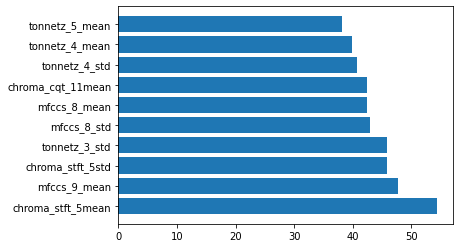

In [92]:
# Anova for feature selection

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fs.scores_)
fs_support = fs.get_support()

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
n_largest = featureScores.nlargest(10, 'Normalized Score')
print(n_largest)
# n_largest['Normalized Score'].values
pyplot.barh([i for i in range(len(n_largest))], n_largest['Normalized Score'].values, tick_label=n_largest['Features'].values)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dis

              Features  Normalized Score
1         mfccs 0 mean         48.457105
19        mfccs 9 mean         43.809578
81    chroma_stft 5std         40.628288
27            rms mean         40.105167
17        mfccs 8 mean         38.885453
16         mfccs 7 std         38.876956
80   chroma_stft 5mean         37.597747
22        mfccs 10 std         31.986140
128      tonnetz 3 std         31.915731
119   chroma_cqt 11std         30.698632


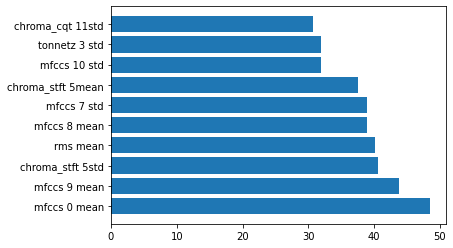

In [100]:
# Run ANoVa 100 times and average the results

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df_2.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels
 
featureScores = pd.DataFrame()
iterations = 100
for i in range(iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
  fs = SelectKBest(score_func=f_classif, k=10)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  dfcolumns = pd.DataFrame(X.columns)
  dfscores = pd.DataFrame(fs.scores_)
  fs_support = fs.get_support()

  # concat two dataframes for better visualization 
  temp = pd.concat([dfcolumns, dfscores],axis=1)
  temp.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
  if featureScores.empty:
    featureScores = temp
  else:
    featScores_values = featureScores['Normalized Score'].values
    temp_values = temp['Normalized Score'].values
    arr = featScores_values + temp_values
    dfscores = pd.DataFrame(arr)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Normalized Score']

featureScores.columns = ['Features', 'Normalized Score']
n_largest = featureScores.nlargest(10, 'Normalized Score')
avg_values = n_largest['Normalized Score'].values 
avg_values /= iterations
print(n_largest)
pyplot.barh([i for i in range(len(n_largest))], n_largest['Normalized Score'].values, tick_label=n_largest['Features'].values)
pyplot.show()

We clearly see that MFCCS and RMS contribute most to the model, how well does our model perform if we just use the top ten features?

In [101]:
top_ten_df = pd.DataFrame()
arr = []
for feature in n_largest['Features']:
    arr.append(X[feature].values)
arr = np.array(arr).T
reduced_X = pd.DataFrame(arr, columns=n_largest['Features'].values)

[[37 10]
 [ 8 46]]
Accuracy of Random Forest : 0.8217821782178217
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        47
         1.0       0.82      0.85      0.84        54

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

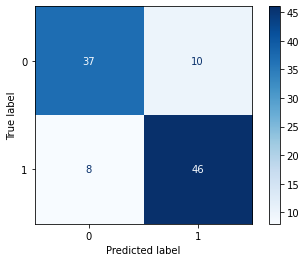

In [104]:
run_random_forest(reduced_X, y)

Comparable results! That's very good to see

[[38  9]
 [12 42]]
Accuracy of SVM : 0.7920792079207921
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        47
         1.0       0.82      0.78      0.80        54

    accuracy                           0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

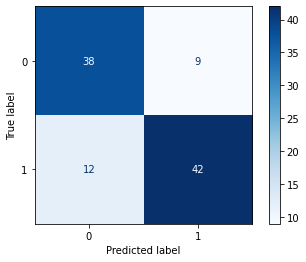

In [106]:
run_svm(reduced_X, y)

In fact, the SVM performs well, too


### Correlation Map

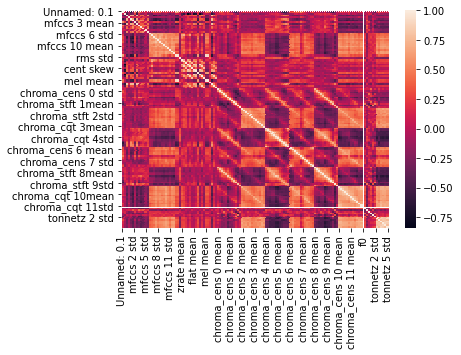

In [107]:
import seaborn as sns

import matplotlib.pyplot as plt

orig_corr_matrix = X.corr()
sns.heatmap(orig_corr_matrix)


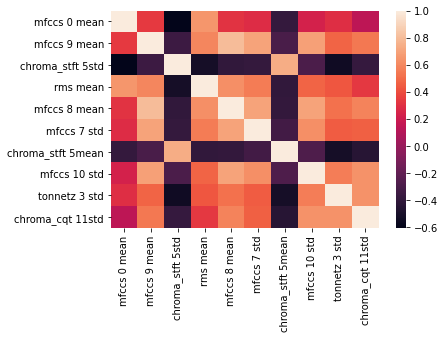

In [108]:
reduced_corr_matrix = reduced_X.corr()
sns.heatmap(reduced_corr_matrix)

Ok, so we know MFCCS and RMS contribute most, but we already knew that from past literature. We see also rms, which wasn't mentioned in too many papers. What else is important?

In [110]:
# Run ANoVa 100 times and average the results

from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

features_df = pd.read_csv("features_df_2.csv")
features = features_df.drop(['Unnamed: 0', 'Engaged'], axis=1)
labels = features_df['Engaged']
X = features
y = labels
 
featureScores = pd.DataFrame()
iterations = 100
for i in range(iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5) 
  fs = SelectKBest(score_func=f_classif, k="all")
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  dfcolumns = pd.DataFrame(X.columns)
  dfscores = pd.DataFrame(fs.scores_)
  fs_support = fs.get_support()

  # concat two dataframes for better visualization 
  temp = pd.concat([dfcolumns, dfscores],axis=1)
  temp.columns = ['Features', 'Normalized Score']  # naming the dataframe columns
  if featureScores.empty:
    featureScores = temp
  else:
    featScores_values = featureScores['Normalized Score'].values
    temp_values = temp['Normalized Score'].values
    arr = featScores_values + temp_values
    dfscores = pd.DataFrame(arr)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Features', 'Normalized Score']

featureScores.columns = ['Features', 'Normalized Score']
biggest_contributors = featureScores.sort_values(by=['Normalized Score'], ascending=False)
avg_values = biggest_contributors['Normalized Score'].values 
avg_values /= iterations
pd.set_option('display.max_rows', None)
biggest_contributors

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  0 120] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dis

,Features,Normalized Score
1,mfccs 0 mean,49.448929
19,mfccs 9 mean,43.861845
81,chroma_stft 5std,40.835836
27,rms mean,40.002031
16,mfccs 7 std,38.594934
17,mfccs 8 mean,37.981357
80,chroma_stft 5mean,35.526008
128,tonnetz 3 std,30.532850
18,mfccs 8 std,30.190091
119,chroma_cqt 11std,29.581567
